In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
from datetime import datetime 

In [12]:
# from hh_requests import *

# vacancies_dict = {
#     'bim-менеджер':None, 
#     'архитектор':[13], 
#     'инженер-конструктор':[13], 
#     'инженер ПТО':[13], 
#     'инженер ОВиК':[13], 
#     'инженер ВК':[13], 
#     'Главный инженер проекта':[13],
#     'курьер': None
#     }
# current_date_time = datetime.now().strftime("%Y-%m-%d")
# df = get_vacancies_df_from_dict(vacancies_dict, [1, 2])
# df.to_excel(f'reports/excel/Вакансии_{current_date_time}.xlsx', index=False)

In [13]:
df = pd.read_excel('reports/excel/Вакансии_2025-10-06.xlsx')
df_old = pd.read_excel('reports/excel/Вакансии_2025-05-07.xlsx')

In [14]:
concat_df = pd.concat([df, df_old], ignore_index=True)
concat_df

,Запрос,Дата,Вакансия,Город,Компания,Ссылка,ЗП,Валюта,Требования,Обязанности
0,bim-менеджер,2025-10-06,Архитектор,Санкт-Петербург,Инпроект,https://hh.ru/vacancy/126168046,130000,RUR,При желании — участие в авторском надзоре. Нам...,Участие в подготовке проектной документации (С...
1,bim-менеджер,2025-10-06,BIM - менеджер,Москва,СЗ Центр-Инвест,https://hh.ru/vacancy/125265524,350000,RUR,Высшее техническое. Опыт работы в аналогичной ...,Формирование BIM-стандартов и регламентов и ко...
2,bim-менеджер,2025-10-06,Главный специалист по информационному моделиро...,Москва,Росжелдорпроект,https://hh.ru/vacancy/125901407,239000,RUR,Наличие высшего профессионального образования ...,Осуществлять методическое и технологическое со...
3,bim-менеджер,2025-10-06,BIM менеджер (координатор),Москва,Проект 31937,https://hh.ru/vacancy/125609486,300000,RUR,Уверенные подтверждённые знания <highlighttext...,Уверенная координация в BIM проекте (создание ...
4,bim-менеджер,2025-10-06,BIM-Менеджер / Главный специалист отдела техно...,Санкт-Петербург,Сэтл Строй,https://hh.ru/vacancy/126006458,184000,RUR,"Высшее образование, желательно ПГС, архитектур...",Осуществления контроля разработки проектов в к...
...,...,...,...,...,...,...,...,...,...,...
9798,курьер,2025-05-07,Курьер для Банка,Санкт-Петербург,Фаст Ривер,https://hh.ru/vacancy/115777829,130000,RUR,Готовность к разъездному характеру работы. Гра...,Выезжать на встречи к клиентам согласно маршру...
9799,курьер,2025-05-07,Курьер-партнёр для Самоката,Москва,СТАФФ МЕНЕДЖМЕНТ ГРУПП,https://hh.ru/vacancy/116452985,150000,RUR,Навык быстрой ориентации на местности или умен...,Доставка товаров (продукты) до покупателя в ус...
9800,курьер,2025-05-07,"Курьер на велосипеде (Москва, пр-т Зеленый, д....",Москва,ВкусВилл,https://hh.ru/vacancy/117234028,120000,RUR,Стильная брендированная форма по желанию. Умен...,Полное отсутствие штрафов и депремирования. До...
9801,курьер,2025-05-07,Водитель-курьер с личным автомобилем (м. Войко...,Москва,"Тануки, японский ресторан",https://hh.ru/vacancy/119087788,6000,RUR,Ищем вежливых и пунктуальных Водителей на личн...,NaN


In [19]:
df_count_all = concat_df[
    ((concat_df['Город']=='Санкт-Петербург') | (concat_df['Город']=='Москва'))
    ]

df_selary = df_count_all[
    (df_count_all['ЗП']!=0)
    ]

df_selary_all = df_selary.copy()
df_selary_all['ЗП'] = df_selary['ЗП']/1000

pivot_mean_salary_all = df_selary_all.pivot_table(
    index='Запрос', 
    columns=['Дата'], 
    values="ЗП",
    aggfunc='mean'
    ).round(1).sort_values('2025-10-06').fillna(0)


pivot_mean_salary_spb = df_selary_all[df_selary_all['Город']=='Санкт-Петербург'].pivot_table(
    index='Запрос', 
    columns=['Дата'], 
    values="ЗП",
    aggfunc='mean'
    ).round(1).sort_values('2025-10-06').fillna(0)

pivot_mean_salary_msk = df_selary_all[df_selary_all['Город']=='Москва'].pivot_table(
    index='Запрос', 
    columns=['Дата'], 
    values="ЗП",
    aggfunc='mean'
    ).round(1).sort_values('2025-10-06').fillna(0)

pivot_count_all = df_count_all.pivot_table(
    index='Запрос', 
    columns=['Дата'], 
    values="ЗП",
    aggfunc='count'
    ).round(1)

pivot_count_spb = df_count_all[df_count_all['Город']=='Санкт-Петербург'].pivot_table(
    index='Запрос', 
    columns=['Дата'], 
    values="ЗП",
    aggfunc='count'
    ).round(1)

pivot_count_msk = df_count_all[df_count_all['Город']=='Москва'].pivot_table(
    index='Запрос', 
    columns=['Дата'], 
    values="ЗП",
    aggfunc='count'
    ).round(1)

display(pivot_mean_salary_all)
display(pivot_mean_salary_msk)
display(pivot_mean_salary_spb)
display(pivot_count_all)


Дата,2025-05-07,2025-10-06
Запрос,,
курьер,141.3,144.6
инженер-конструктор,157.4,162.9
инженер ПТО,152.1,163.0
инженер ВК,161.8,170.6
инженер ОВиК,168.4,170.8
архитектор,170.6,186.5
bim-менеджер,188.6,193.8
Главный инженер проекта,203.9,213.9


Дата,2025-05-07,2025-10-06
Запрос,,
курьер,139.1,145.9
инженер ПТО,158.4,167.2
инженер ОВиК,171.9,172.5
инженер-конструктор,170.2,174.9
инженер ВК,169.0,178.0
архитектор,181.2,196.5
bim-менеджер,209.6,218.6
Главный инженер проекта,219.4,240.0


Дата,2025-05-07,2025-10-06
Запрос,,
курьер,145.2,141.6
инженер-конструктор,137.5,143.1
инженер ПТО,138.4,153.6
bim-менеджер,163.4,154.9
инженер ВК,149.4,156.8
архитектор,143.7,162.7
инженер ОВиК,159.1,165.2
Главный инженер проекта,170.7,175.6


Дата,2025-05-07,2025-10-06
Запрос,,
bim-менеджер,48,34
Главный инженер проекта,374,383
архитектор,815,757
инженер ВК,334,347
инженер ОВиК,280,272
инженер ПТО,678,753
инженер-конструктор,345,301
курьер,1949,1912


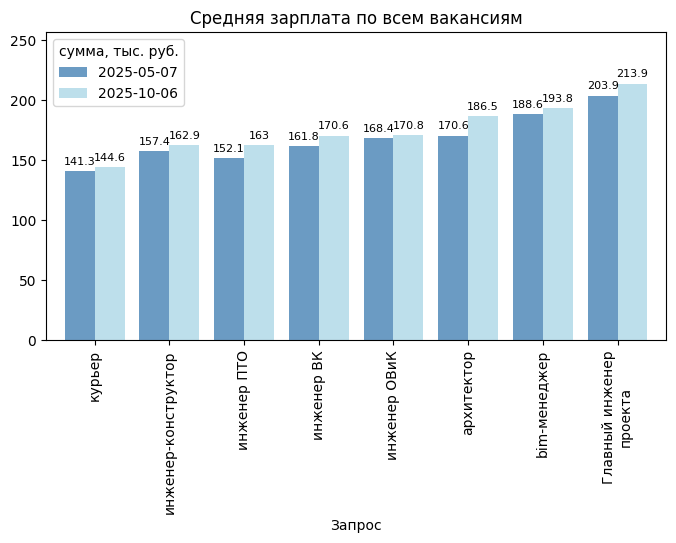

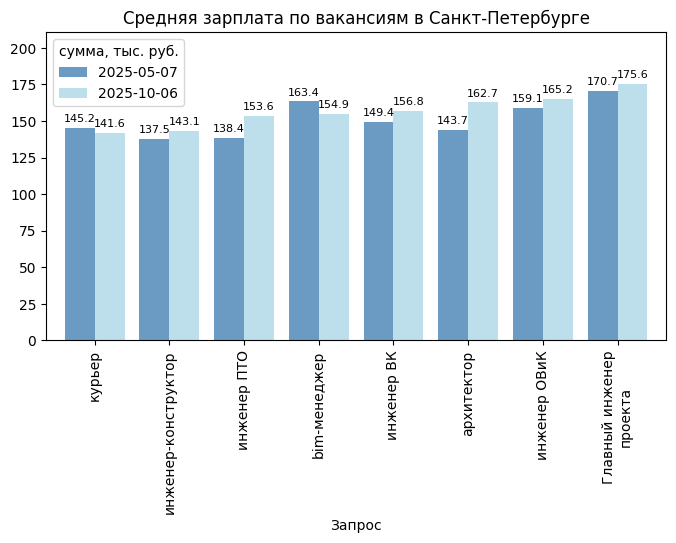

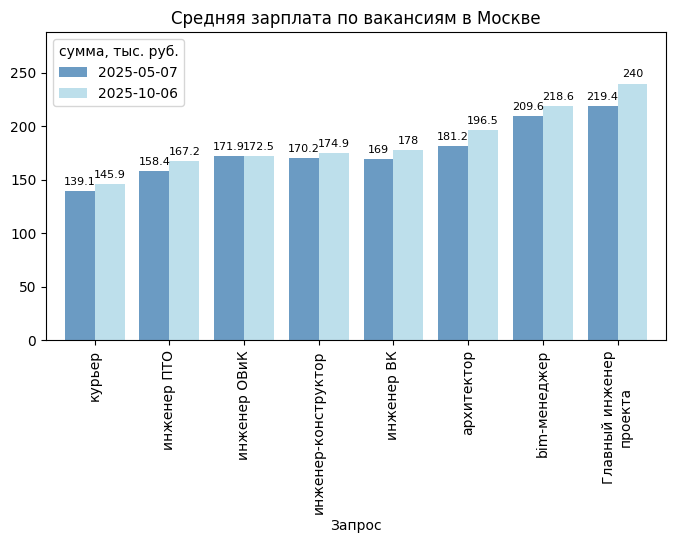

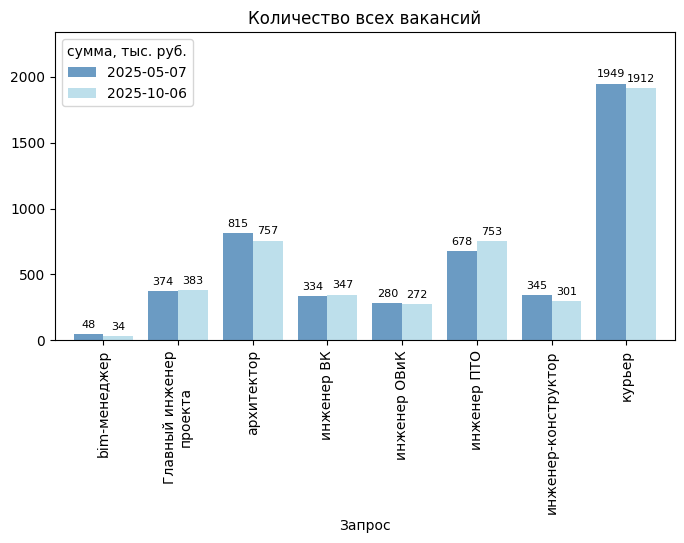

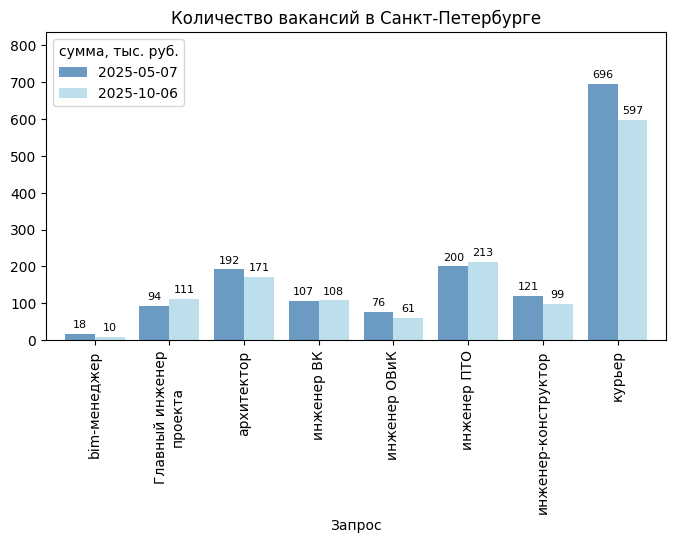

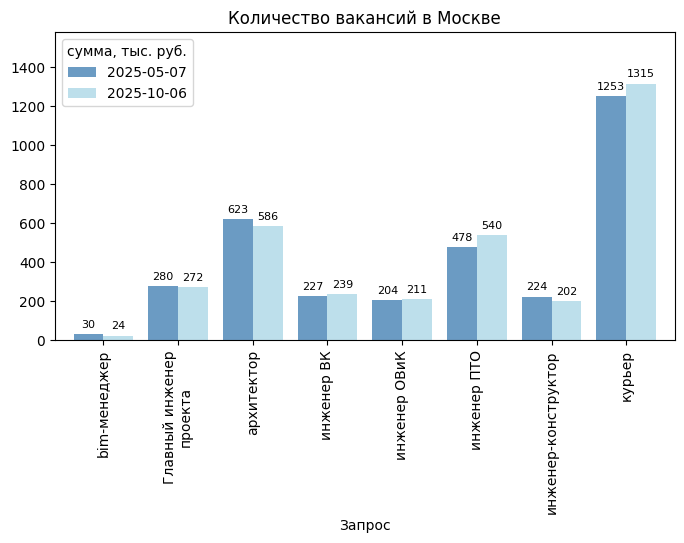

KeyError: 'Главный инженер проекта'

In [ ]:
def plot_bar(df:pd.DataFrame, title:str = ''):
    ax1 = df.plot(
    kind='bar', 
    color=['steelblue', 'lightblue'], 
    width=0.8, 
    alpha=0.8, 
    figsize=(8, 4),
    fontsize=10
    )
    for container in ax1.containers:
        ax1.bar_label(container, label_type='edge', padding=3, fontsize = 8)

    ax1.legend(title='сумма, тыс. руб.', loc='upper left')
    max_qty = df.values.max()
    ax1.set_ylim(0, max_qty * 1.2)  # +25% сверху
    max_sum = pivot_count_all.values.max()
    plt.title(title)
    labels = [item.get_text() for item in ax1.get_xticklabels()]
    max_width = 20
    wrapped_labels = ['\n'.join(textwrap.wrap(label, width=max_width)) for label in labels]
    ax1.set_xticklabels(wrapped_labels, rotation=90, ha='center')
    ax1.grid(False)
    plt.show()

plot_bar(pivot_mean_salary_all, 'Средняя зарплата по всем вакансиям')
plot_bar(pivot_mean_salary_spb, 'Средняя зарплата по вакансиям в Санкт-Петербурге')
plot_bar(pivot_mean_salary_msk, 'Средняя зарплата по вакансиям в Москве')
plot_bar(pivot_count_all, 'Количество всех вакансий')
plot_bar(pivot_count_spb, 'Количество вакансий в Санкт-Петербурге')
plot_bar(pivot_count_msk, 'Количество вакансий в Москве')
df_count_all['Главный инженер проекта'].hist()
